# Unemployment Analysis with python in Rural and Urban area

## Import Libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Import Dataset

In [29]:
df = pd.read_csv(r'C:\Users\gpran\Downloads\Telegram Desktop\Unemployment_Analysis_for_Rural_and_Urban_Area.csv')

In [30]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [31]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [33]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [34]:
df.sample()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
107,Haryana,30-06-2020,Monthly,35.57,4357835.0,48.53,Rural


In [35]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

### Checking for null values

In [36]:
df.isnull()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
763,True,True,True,True,True,True,True
764,True,True,True,True,True,True,True
765,True,True,True,True,True,True,True
766,True,True,True,True,True,True,True


In [37]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

There are 28 null values in all columns of the dataset

In [38]:
df.shape

(768, 7)

We will drop the null records.

In [39]:
df.dropna(axis=0, inplace=True)

In [40]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [41]:
df.shape

(740, 7)

In [42]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

For better understanding I will rename the columns.

In [43]:
df.columns = ["State", "Date", "Frequency", "Estimated Unemployment Rate", "Estimated Employed", "Estimated Labour Participation Rate", "Area"]

In [44]:
df.columns

Index(['State', 'Date', 'Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Area'],
      dtype='object')

## Correlation between features of dataset using Heatmap

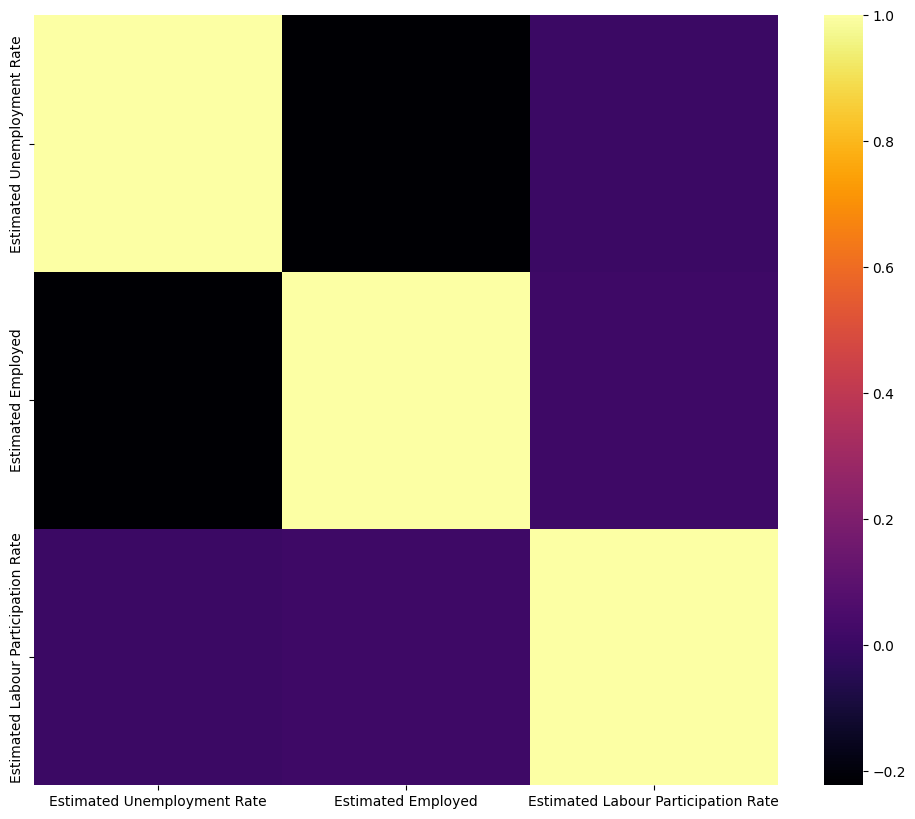

In [45]:
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), cmap='inferno')
plt.show()

## Data Visualization

### Employment Rate according to different Area

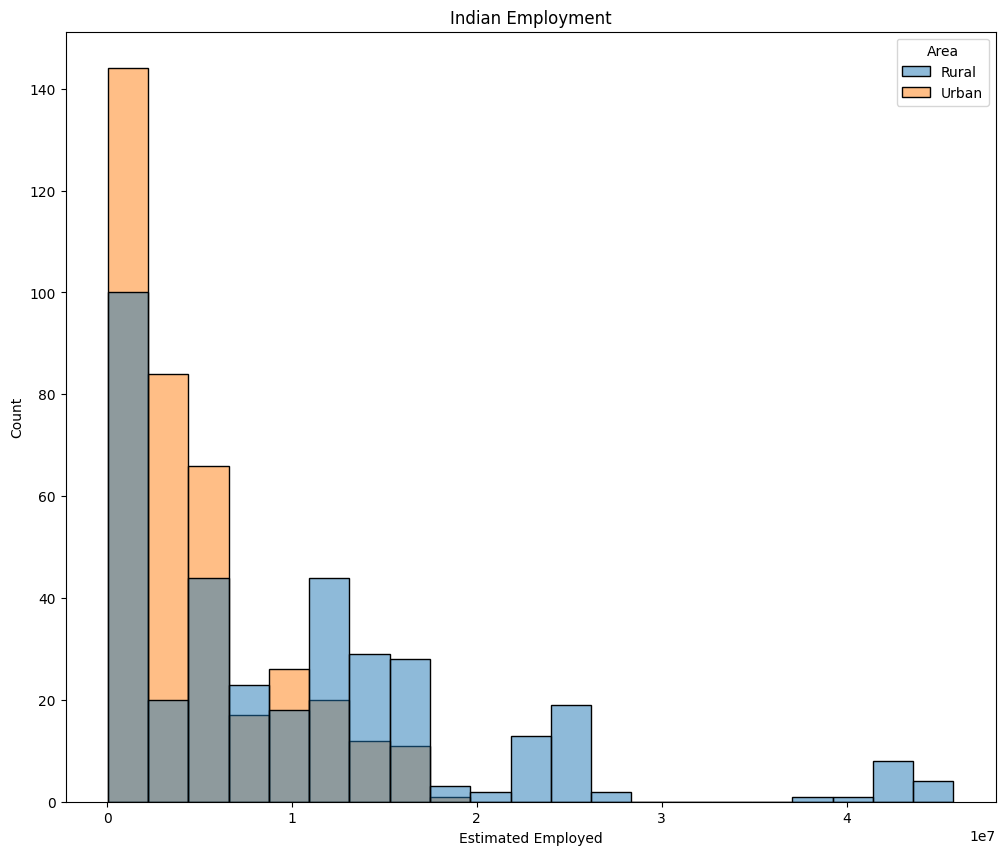

In [46]:
df.columns = ["State", "Date", "Frequency", "Estimated Unemployment Rate", "Estimated Employed", "Estimated Labour Participation Rate", "Area"]
plt.figure(figsize=(12, 10))
plt.title("Indian Employment")
sns.histplot(x="Estimated Employed", hue = "Area", data=df)
plt.show()

### Unemployment Rate according to different Area

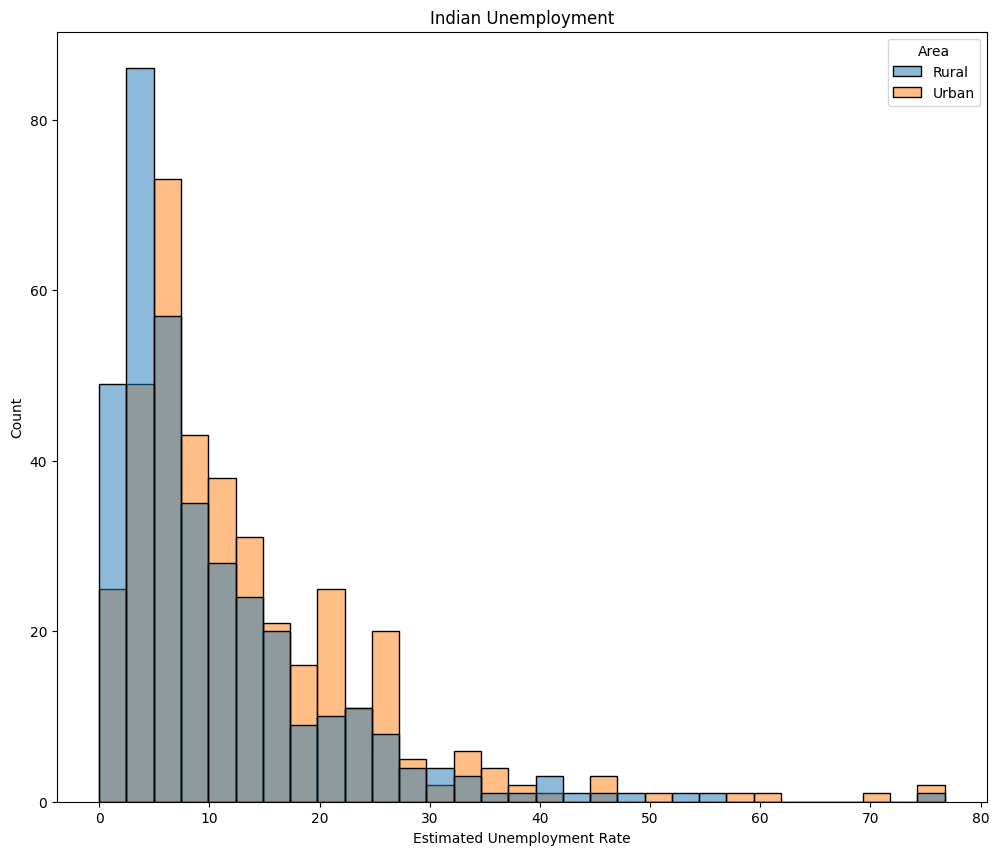

In [47]:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x = "Estimated Unemployment Rate", hue = "Area", data=df)
plt.show()

## Unemployment Rate of each state of India by Area using Sunburst plot

In [48]:
unemployment = df[["State", "Area", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemployment, path=["Area", "State"], values = "Estimated Unemployment Rate", width = 600, height = 600, color_continuous_scale='RdGy', title="Unemployment Rate in India")
figure.show()

## Unemployment Rate of each state of India by Area using Treemap

In [26]:
unemployment = df[["State", "Area", "Estimated Unemployment Rate"]]
fig = px.treemap(unemployment, path=["State"], title = "Unemployment Rate in India ",  color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_traces(textinfo="label+percent entry", hoverinfo = "all", marker=dict(line=dict(width=2)),)
fig.show()